# Welcome to PyHEP 2020!

<br><br><br>

Before writing this tutorial, I took a look at the survey...

In [1]:
import pandas
df = pandas.read_csv("survey-results.csv")
df

,"PyHEP feedback: Atlantic: 15:00 CET, 06:00 PDT, 18:30 IST, 22:00 JST","PyHEP feedback: Pacific: 00:00 CET, 15:00 PDT, 03:30 IST, 07:00 JST","PyHEP feedback: Indian Ocean: 09:00 CET, 00:00 PDT, 12:30 IST, 16:00 JST",PyHEP feedback: How did you hear about this workshop?,PyHEP feedback: What are you hoping to learn from this workshop?,Professional life: What best describes your occupation?,Professional life: What best describes the stage of your professional career?,"Professional life: If you're involved in computing, what do you do?","Professional life: If you write software, what is its lifespan and scope?","Professional life: Are you associated with one or more experimental or theoretical collaborations? (E.g. ATLAS, CMS, DUNE, USQCD...)",...,Particle physics ecosystem: hepunits: https://github.com/scikit-hep/hepunits,Particle physics ecosystem: particle: https://github.com/scikit-hep/particle,Particle physics ecosystem: pyjet: https://github.com/scikit-hep/pyjet,Particle physics ecosystem: Astropy: https://www.astropy.org,Particle physics ecosystem: Geant4Py: https://nusoft.fnal.gov/larsoft/doxsvn/html/md_geant4.10.03.p03_environments_g4py_README.html,Particle physics ecosystem: luigi: https://luigi.readthedocs.io,Particle physics ecosystem: Rucio: https://rucio.readthedocs.io,Particle physics ecosystem: Gaudi: https://github.com/lgiordani/gaudi,Particle physics ecosystem: Condor: https://htcondor.readthedocs.io/en/latest/apis/python-bindings,Particle physics ecosystem: Do you regularly use any other packages that weren't listed here?
0,Great!,BAD,Acceptable,My physics collaboration's mailing list(s),Machine learning/deep learning toolkits; Parti...,"I research particle physics (experiment, theor...",Grad student involved in research,Studies that improve the quality of reconstruc...,Deployed widely,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acceptable,BAD,Great!,HSF mailing lists or announcements; Word of mo...,General-purpose data analysis toolkits; Machin...,"I research particle physics (experiment, theor...",Grad student involved in research,Studies that improve the quality of reconstruc...,Used in small group,NaN,...,Don't know what it is,Don't know what it is,Don't know what it is,Don't know what it is,Don't know what it is,Don't know what it is,Don't know what it is,Through dependencies only,Through dependencies only,NaN
2,Great!,BAD,Acceptable,"Word of mouth (in person, personal email, chat...",Particle physics analysis tools (other than RO...,I develop/maintain software,Grad student involved in research,"Developing libraries for data analysts (i.e. ""...",Deployed widely,NaN,...,Never,Never,Never,Never,Never,Never,Never,Never,Never,NaN
3,Great!,NaN,NaN,My physics collaboration's mailing list(s),General-purpose data analysis toolkits; Machin...,"I research particle physics (experiment, theor...",Grad student involved in research,Software the simulates physics (e.g. Monte Car...,Mostly use-once,NaN,...,Never,Never,Never,Never,Never,Never,Never,Through dependencies only,Never,NaN
4,Great!,BAD,Acceptable,My physics collaboration's mailing list(s),General-purpose data analysis toolkits; Machin...,"I research particle physics (experiment, theor...",Postdoc/fellow/temporary research position,NaN,Used in small group,CMS,...,Don't know what it is,Don't know what it is,Don't know what it is,Don't know what it is,Never,Don't know what it is,Don't know what it is,Don't know what it is,Regularly,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Acceptable,BAD,Great!,My physics collaboration's mailing list(s),General-purpose data analysis toolkits; Machin...,"I research particle physics (experiment, theor...",Grad student involved in research,Software the simulates physics (e.g. Monte Car...,Deployed widely,ATLAS,...,Never,Never,Don't know what it is,Don't know what it is,Don't know what it is,Don't know what it is,Regularly,Don't know what it is,Never,NaN
390,Acceptable,Great!

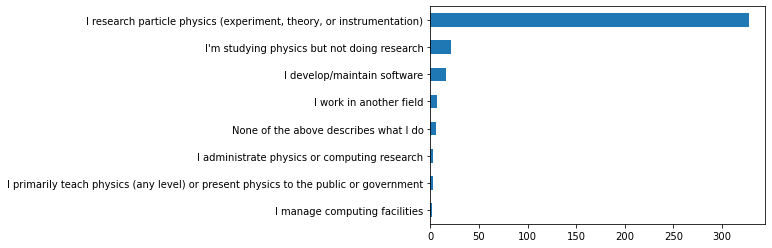

In [2]:
df["Professional life: What best describes your occupation?"].value_counts(ascending=True).plot.barh();

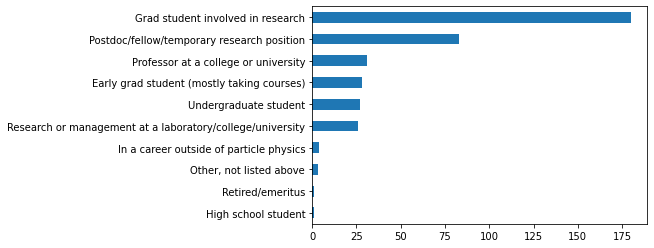

In [3]:
df["Professional life: What best describes the stage of your professional career?"].value_counts(ascending=True).plot.barh();

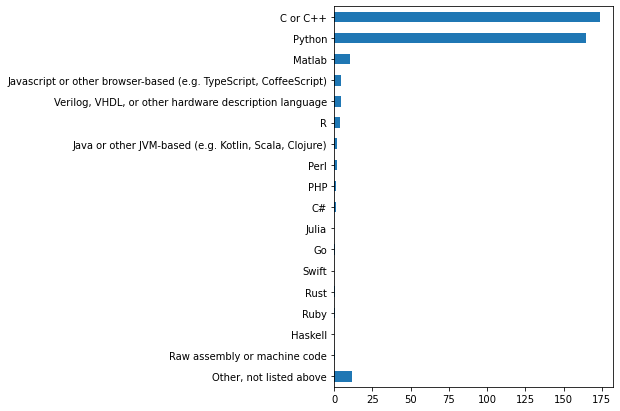

In [4]:
languages = [
    "C or C++",
    "Python",
    "Matlab",
    "Javascript or other browser-based (e.g. TypeScript, CoffeeScript)",
    "Verilog, VHDL, or other hardware description language",
    "R",
    "Java or other JVM-based (e.g. Kotlin, Scala, Clojure)",
    "Perl",
    "PHP",
    "C#",
    "Julia",
    "Go",
    "Swift",
    "Rust",
    "Ruby",
    "Haskell",
    "Raw assembly or machine code",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if language in responses else 0.0 for language in languages]
exploded = df[["Computing and programming: Which of the following languages do you use regularly (i.e. more than 10% of your work)?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=languages)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7));

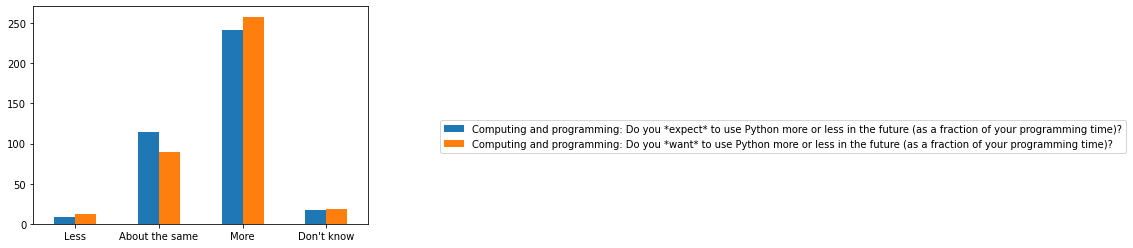

In [5]:
df[[
    "Computing and programming: Do you *expect* to use Python more or less in the future (as a fraction of your programming time)?",
    "Computing and programming: Do you *want* to use Python more or less in the future (as a fraction of your programming time)?"
]].apply(pandas.Series.value_counts).loc[["Less", "About the same", "More", "Don't know"]].plot.bar(rot=0).legend(bbox_to_anchor=(1.2, 0.5));

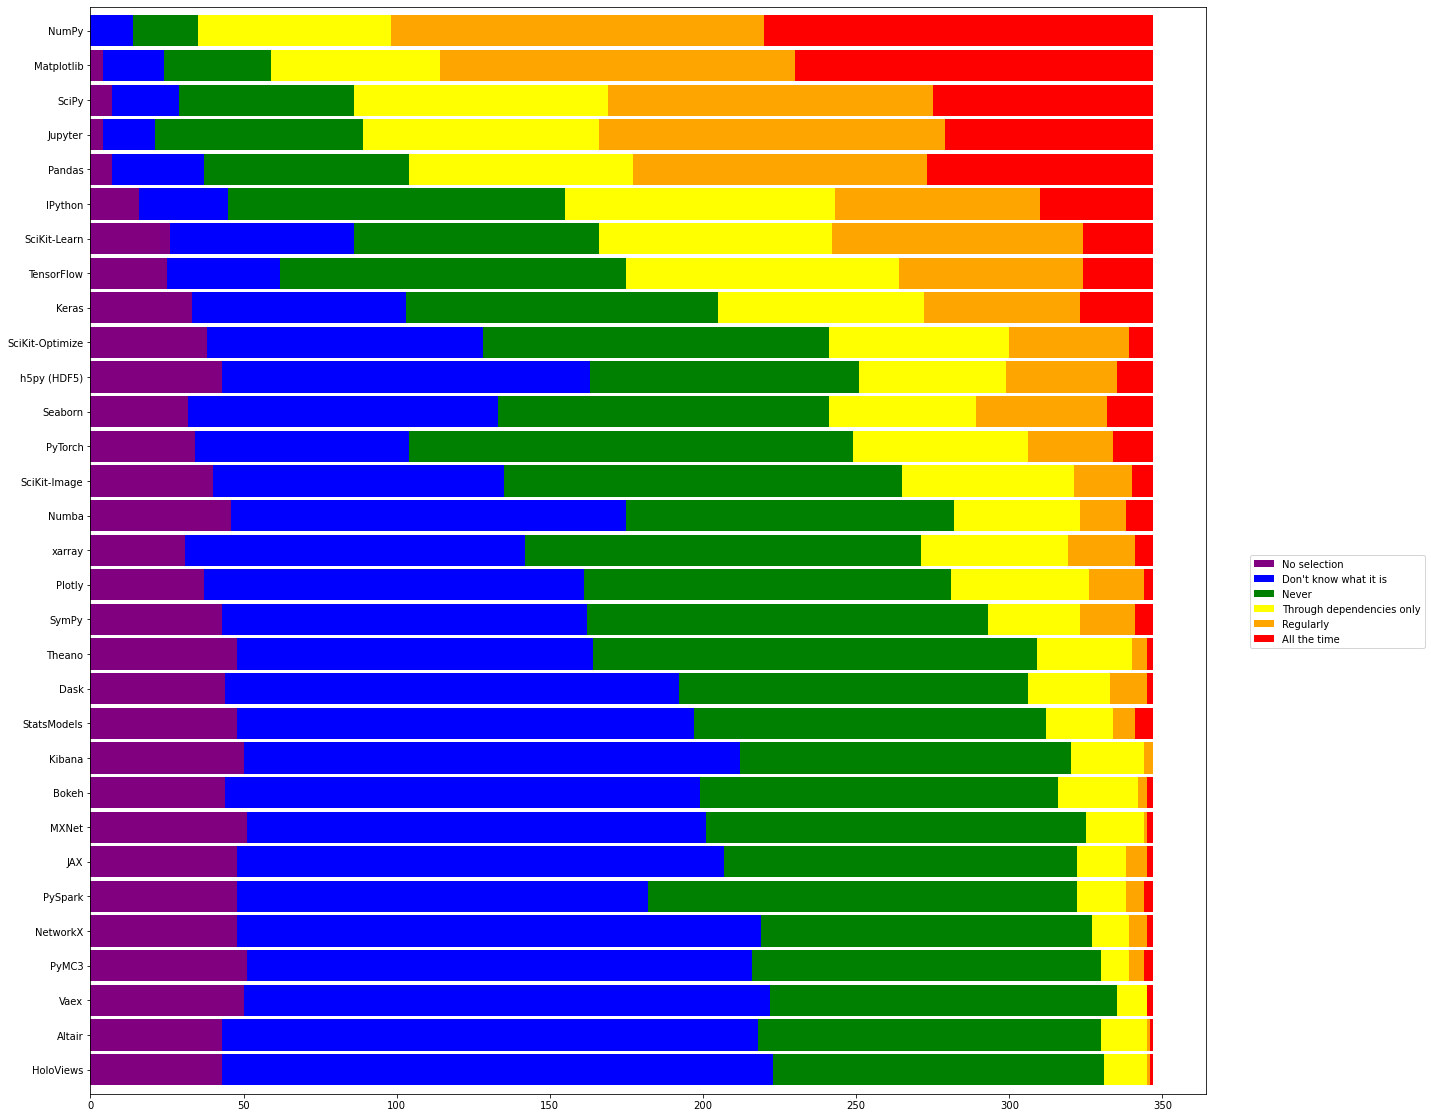

In [6]:
cols = {x: x.split(":")[1].strip() for x in df.columns if x.startswith("Python ecosystem:") and "?" not in x}
order = ((df[list(cols)] == "Don't know what it is") | (df[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = df[order].rename(columns=cols).apply(pandas.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(20, 20), color=["purple", "blue", "green", "yellow", "orange", "red"]).legend(bbox_to_anchor=(1.2, 0.5));

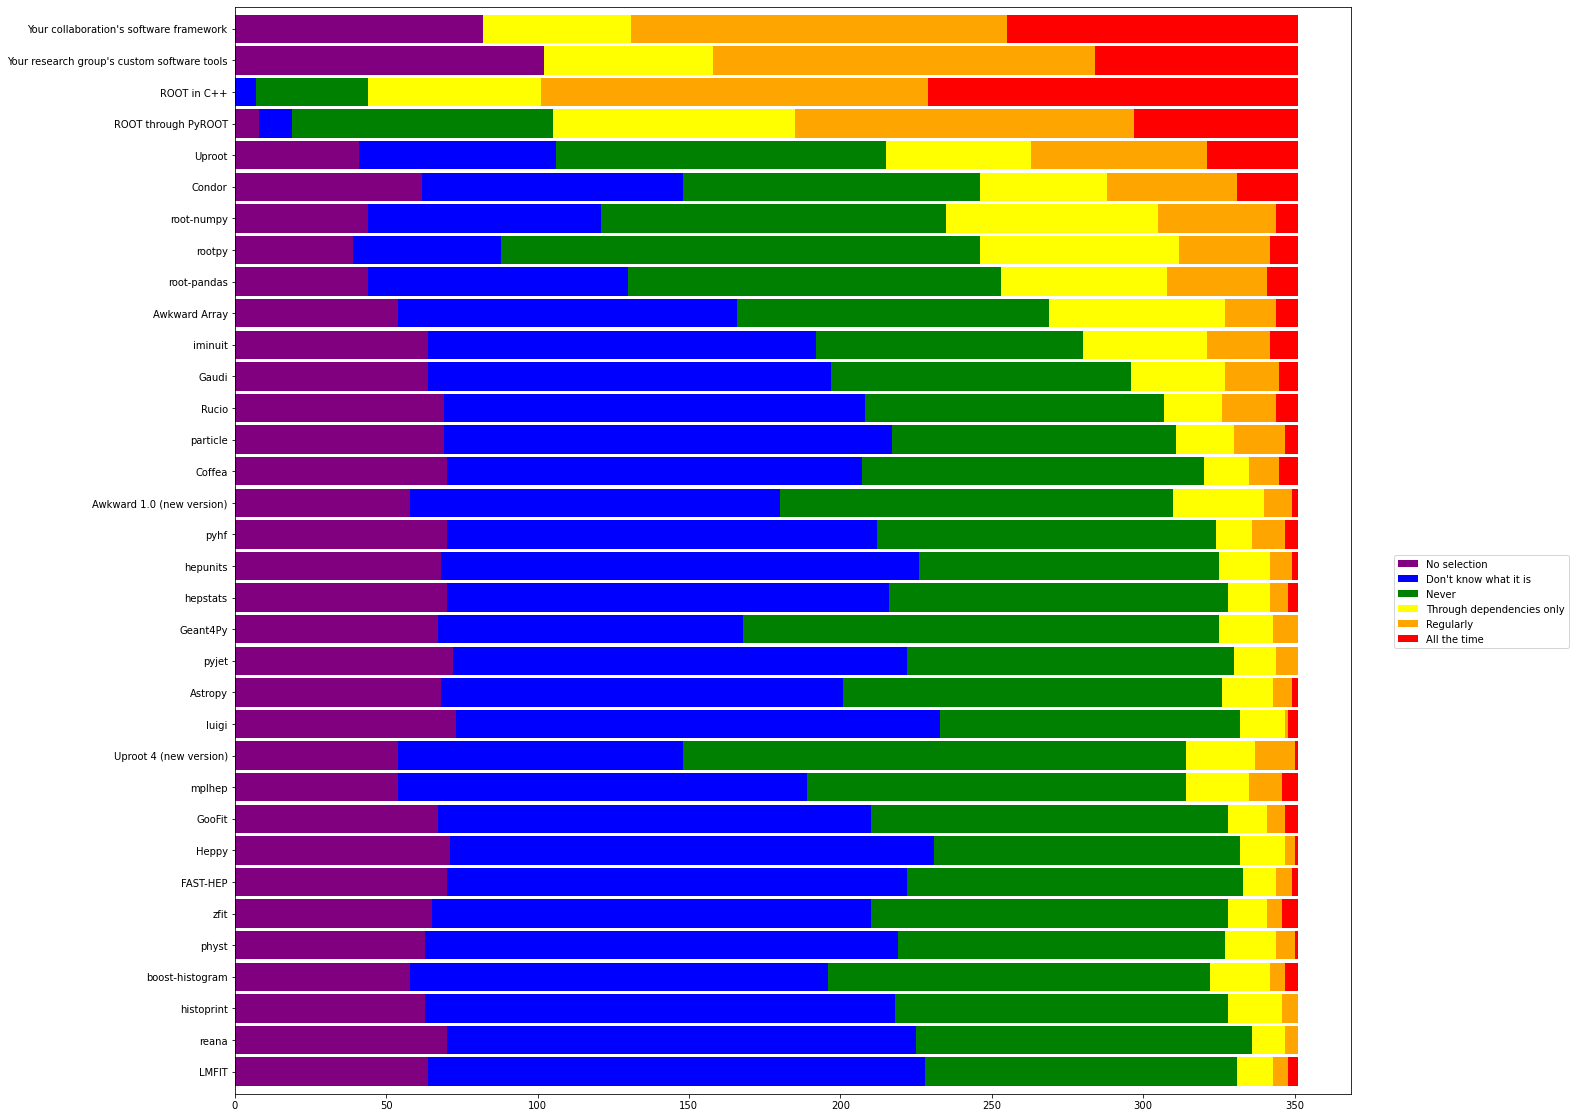

In [7]:
cols = {x: x.split(":")[1].strip() for x in df.columns if x.startswith("Particle physics ecosystem:") and "?" not in x}
order = ((df[list(cols)] == "Don't know what it is") | (df[list(cols)] == "Never")).sum(axis=0).sort_values(ascending=False).index.tolist()
pkgs = df[order].rename(columns=cols).apply(pandas.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
pkgs.plot.barh(stacked=True, width=0.9, figsize=(20, 20), color=["purple", "blue", "green", "yellow", "orange", "red"]).legend(bbox_to_anchor=(1.2, 0.5));

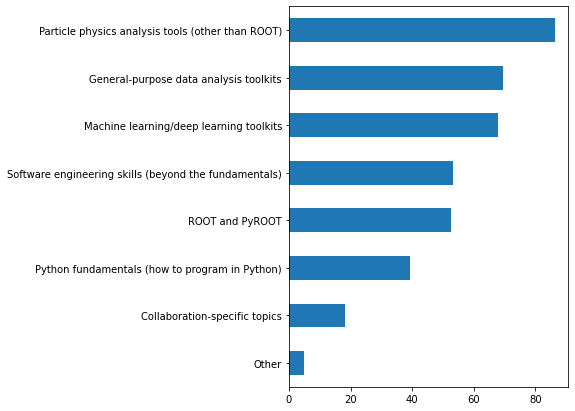

In [8]:
hopes = [
    "Particle physics analysis tools (other than ROOT)",
    "General-purpose data analysis toolkits",
    "Machine learning/deep learning toolkits",
    "Software engineering skills (beyond the fundamentals)",
    "ROOT and PyROOT",
    "Python fundamentals (how to program in Python)",
    "Collaboration-specific topics",
    "Other",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if hope in responses else 0.0 for hope in hopes]
exploded = df[["PyHEP feedback: What are you hoping to learn from this workshop?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=hopes)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh(figsize=(5, 7));

<br><br><br><br><br>

## Conclusions:

   1. You are mostly grad students and postdocs engaged in physics research.
   2. You use Python and C++ about equally, but want to use Python more.
   3. You are familiar with the major libraries of the Python world: NumPy, Matplotlib, machine learning.
   4. You are less familiar with Python libraries developed for physics analysis.
   5. But you want to.

Let's change that!

<br><br><br><br><br>